In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

In [2]:
# Load the data file into a dataframe
df = pd.read_csv("C:/Users/patir/project_jupyter/Classification_Modelling/bike_buyers_clean.csv")

In [3]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [4]:
df = df.drop(columns='ID')

In [5]:
# Get basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Marital Status    1000 non-null   object
 1   Gender            1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Children          1000 non-null   int64 
 4   Education         1000 non-null   object
 5   Occupation        1000 non-null   object
 6   Home Owner        1000 non-null   object
 7   Cars              1000 non-null   int64 
 8   Commute Distance  1000 non-null   object
 9   Region            1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB
None

Summary Statistics:
              Income     Children         Cars          Age
count    1000.000000  1000.000000  1000.000000  1000.000000
mean    56140.000000     1.908000     1

In [6]:
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

Totally there are 0 null values in the dataset


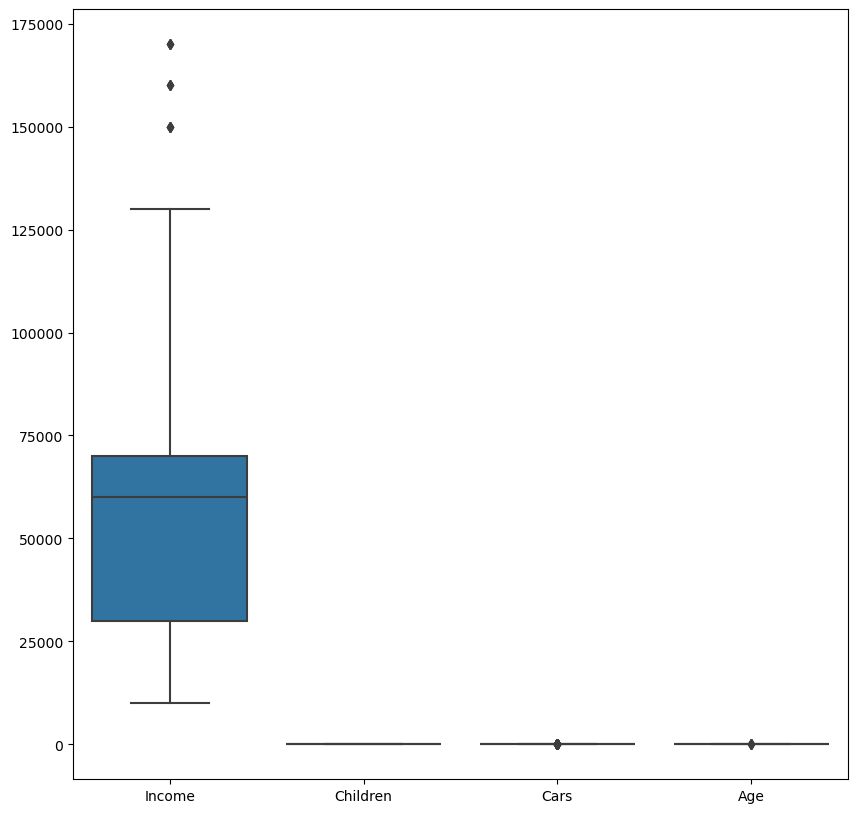

In [7]:
# just to visualize.
sns.boxplot(data=df[['Income','Children', 'Cars', 'Age']])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [8]:
columns = df.columns
print(columns)

Index(['Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')


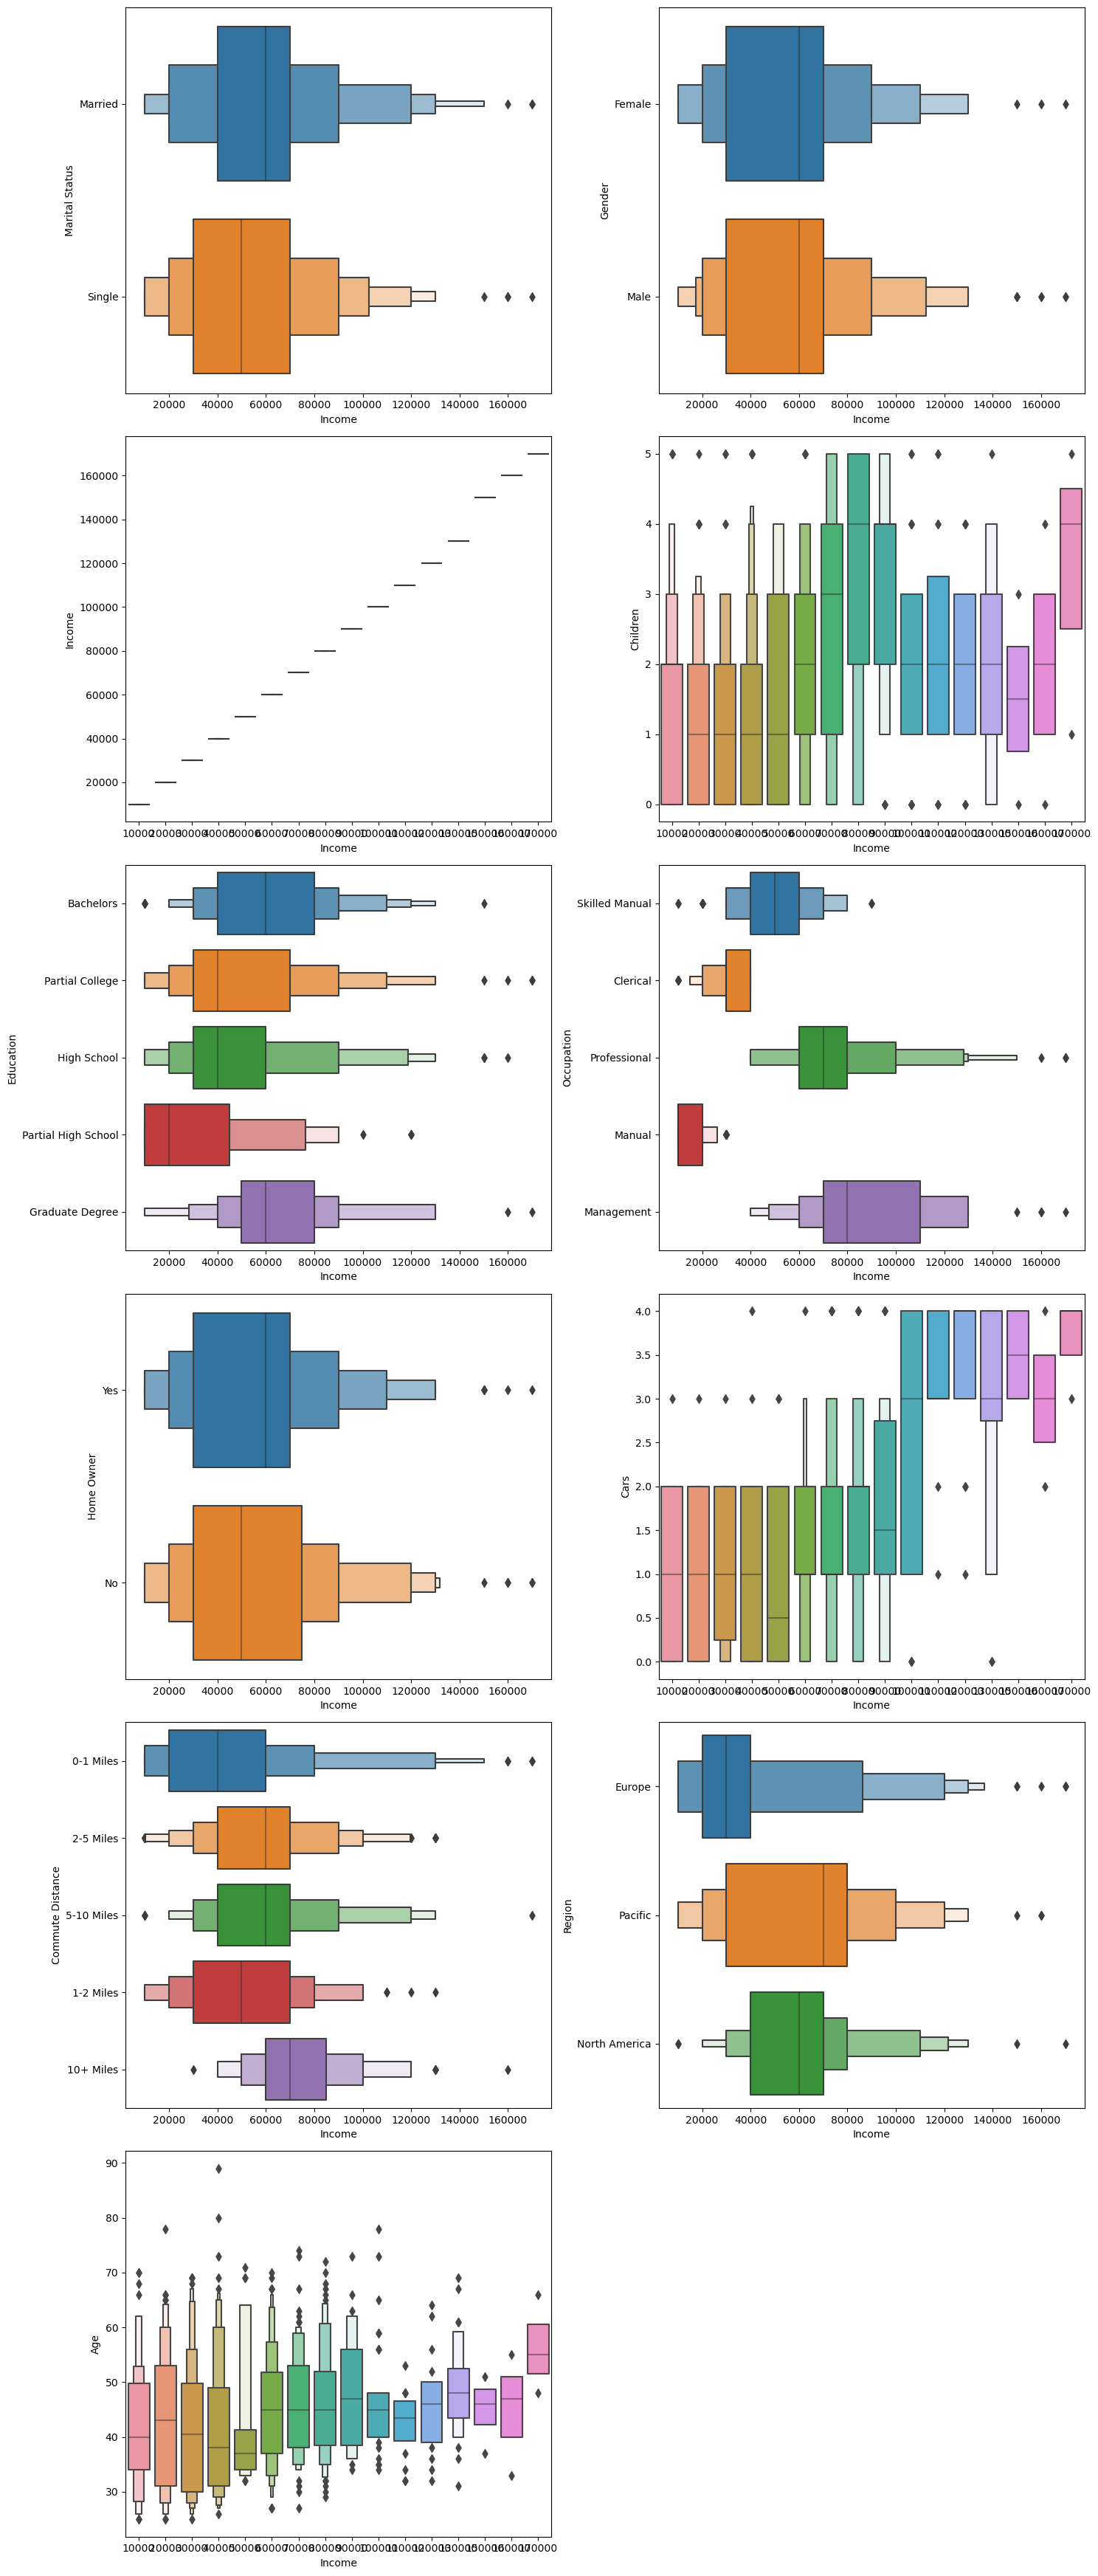

In [9]:
plt.figure(figsize=(15, 35))

for i in range(1,12):
    plt.subplot(6, 2, i)
    sns.boxenplot(x='Income', y=columns[i-1], data=df)

plt.tight_layout()
plt.show()
fig.savefig('boxenplot_1.png')

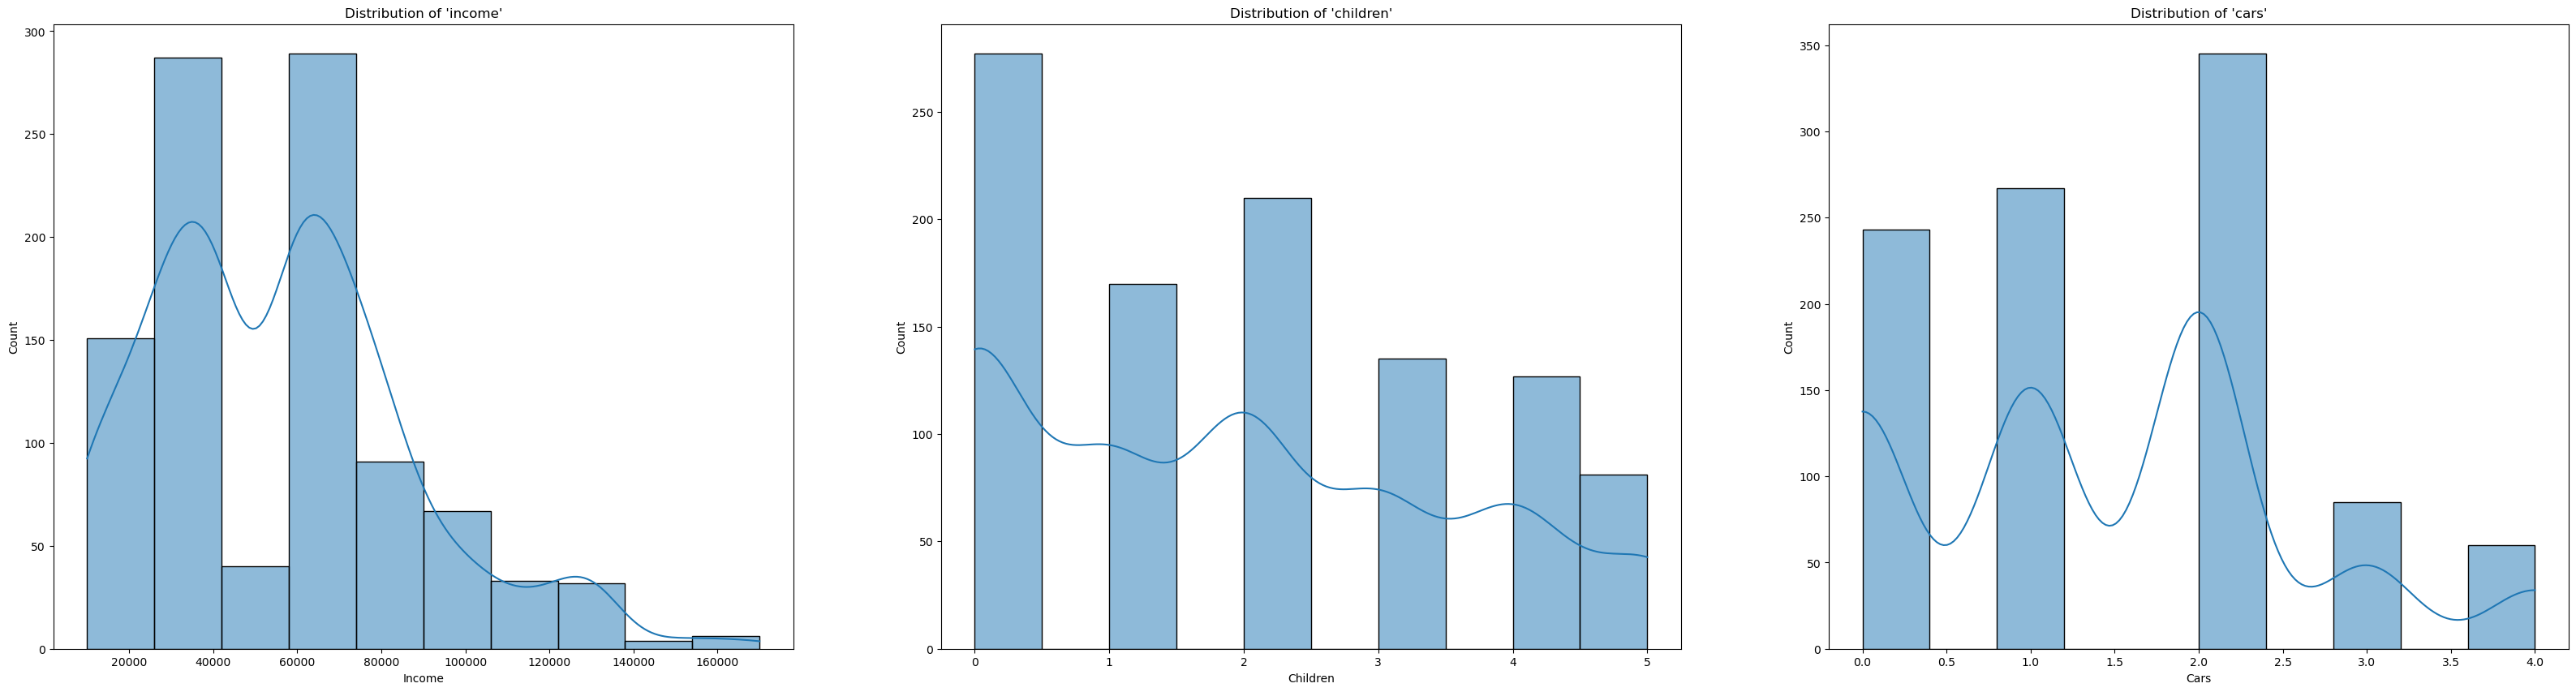

In [10]:
plt.figure(figsize=(40, 10))

plt.subplot(1, 3, 1)
sns.histplot(x=df["Income"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'income'")

plt.subplot(1, 3, 2)
sns.histplot(x=df["Children"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'children'")

plt.subplot(1, 3, 3)
sns.histplot(x=df["Cars"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'cars'")

plt.show()

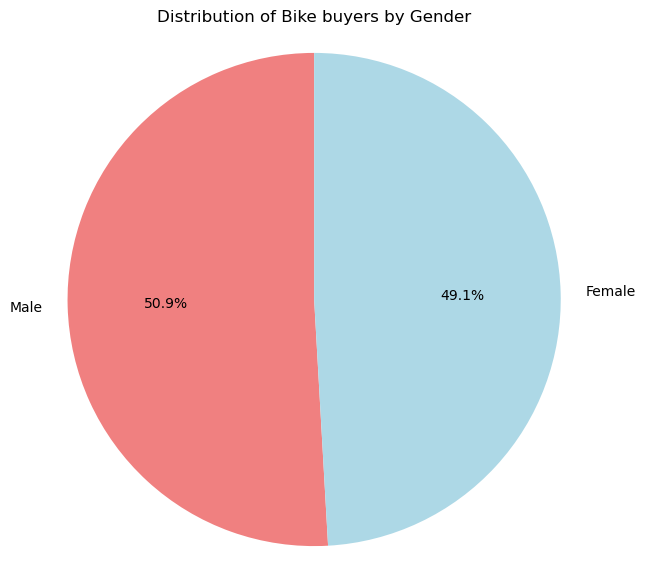

In [11]:
#Gender
plt.figure(figsize=(7, 7), dpi=100)

counts = df['Gender'].value_counts(normalize=True)
labels = counts.index
sizes = counts.values
colors = ['lightcoral', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title("Distribution of Bike buyers by Gender")
plt.show()

Correlation matrix:
            Income  Children      Cars       Age
Income    1.000000  0.258558  0.447695  0.169128
Children  0.258558  1.000000  0.273985  0.530621
Cars      0.447695  0.273985  1.000000  0.190577
Age       0.169128  0.530621  0.190577  1.000000


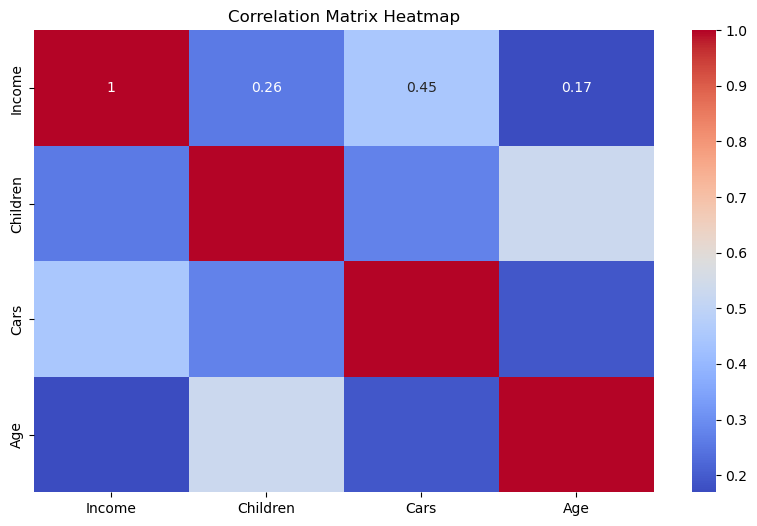

In [12]:
# Correlation Analysis
correlation_matrix = df.select_dtypes('number').corr()
print("Correlation matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

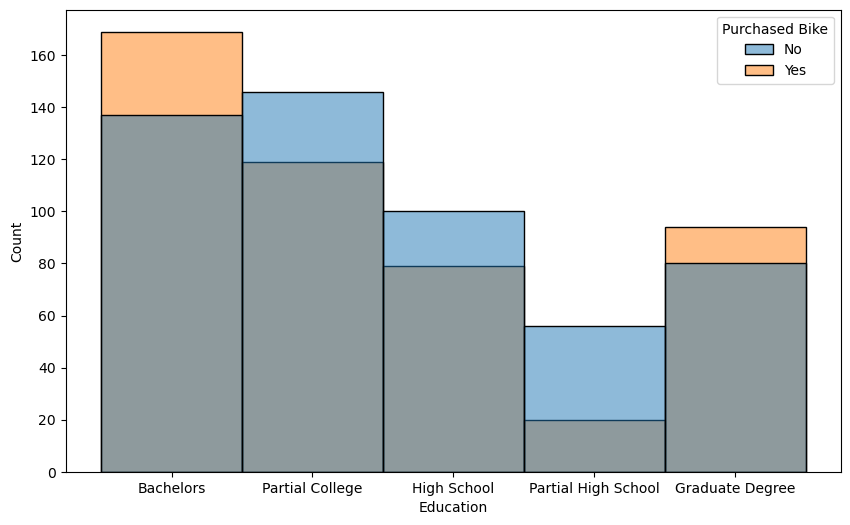

In [13]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Education', bins = 'auto',  hue = 'Purchased Bike')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

  Marital Status    Income
0        Married  31500000
1         Single  24640000


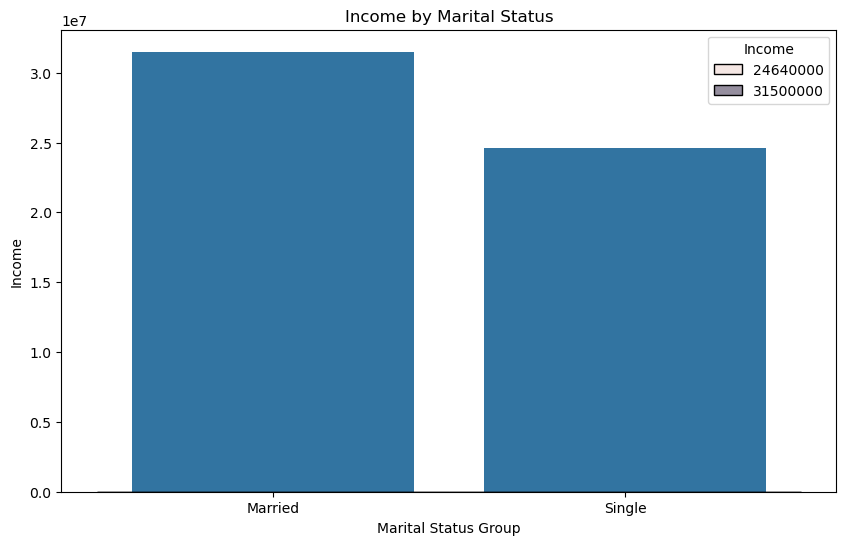

In [14]:
plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]
gender_by_age = df.groupby('Marital Status')['Income'].sum().reset_index()
sns.barplot(x='Marital Status', y='Income', data=gender_by_age, color=base_color)
sns.histplot(data = gender_by_age, x = 'Marital Status', bins = 'auto',  hue = 'Income')

# Set labels and title
plt.xlabel('Marital Status Group')
plt.ylabel('Income')
plt.title('Income by Marital Status')

print(gender_by_age.head())

<Axes: xlabel='Age', ylabel='Income'>

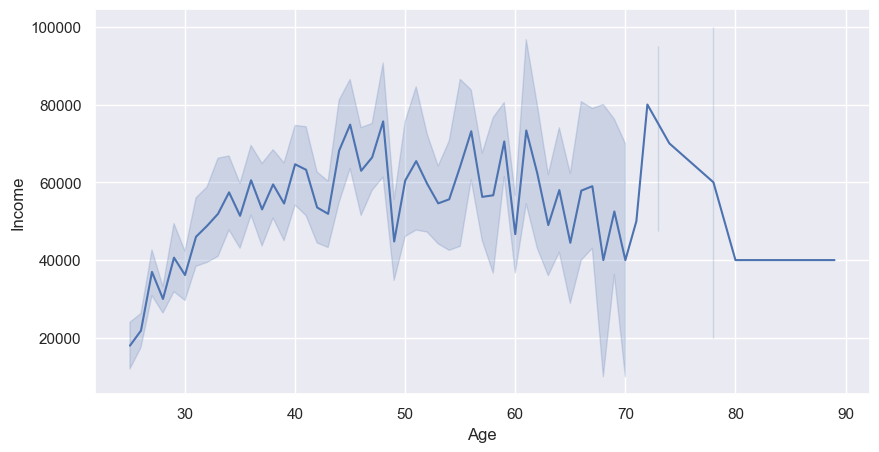

In [15]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data = df,  x ='Age', y ='Income')

<Axes: xlabel='Age', ylabel='Income'>

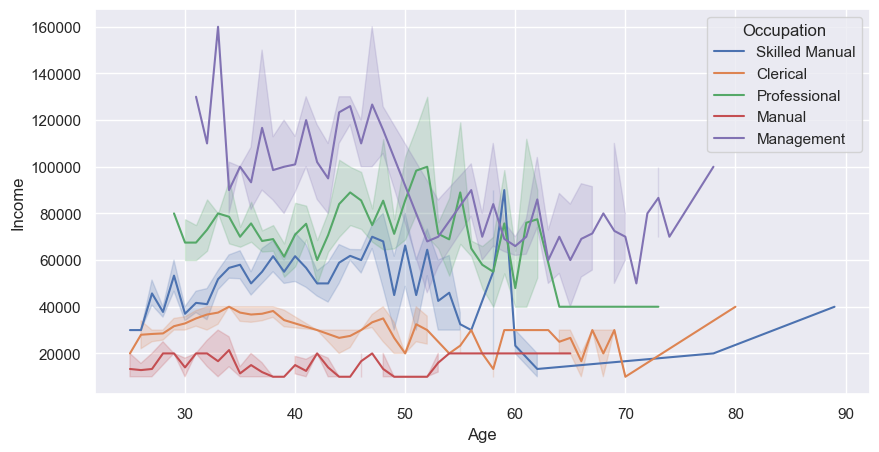

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data = df,  x ='Age',  y ='Income', hue ='Occupation')

<Axes: xlabel='Income', ylabel='Density'>

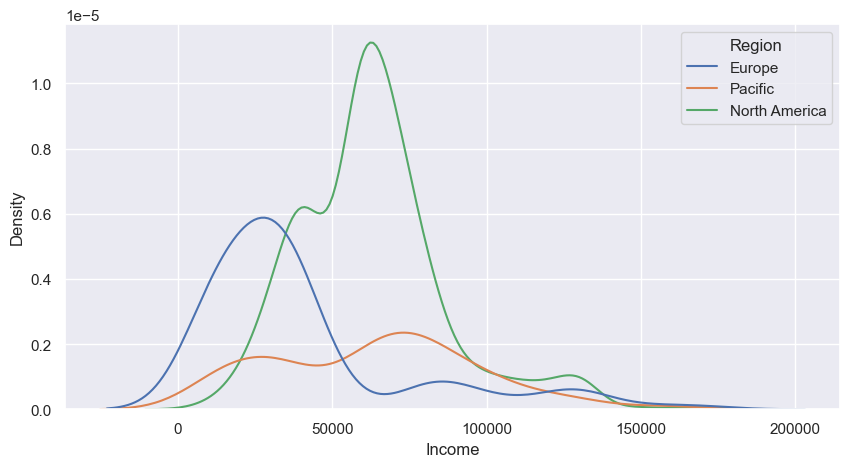

In [20]:
sns.kdeplot(data = df, x = 'Income', hue = 'Region')

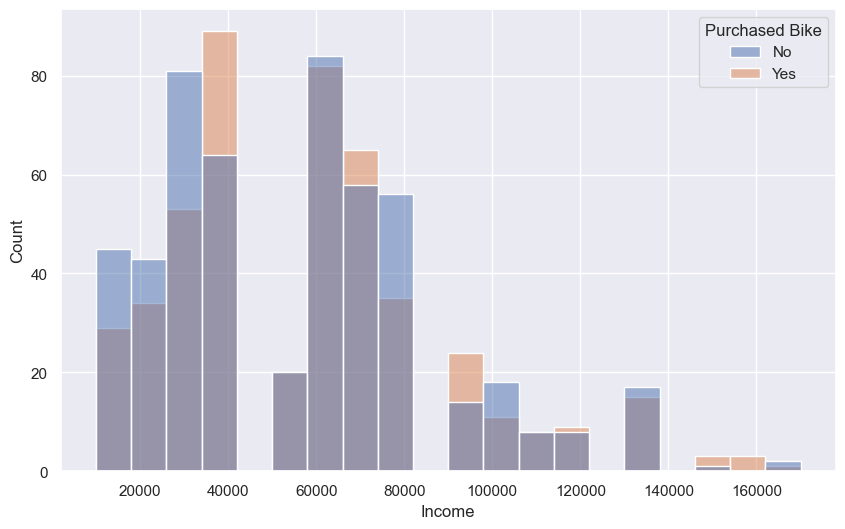

In [21]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Income', bins = 'auto',  hue = 'Purchased Bike')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

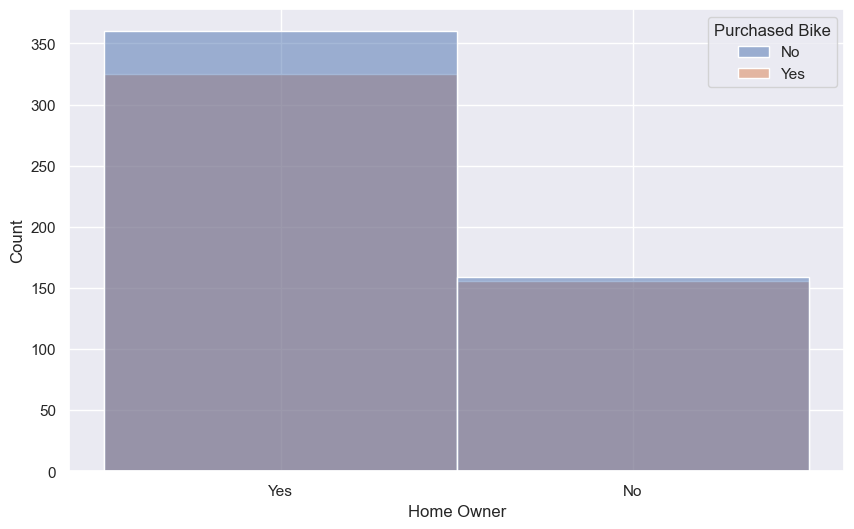

In [22]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Home Owner', bins = 'auto',  hue = 'Purchased Bike')
plt.xlabel('Home Owner')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

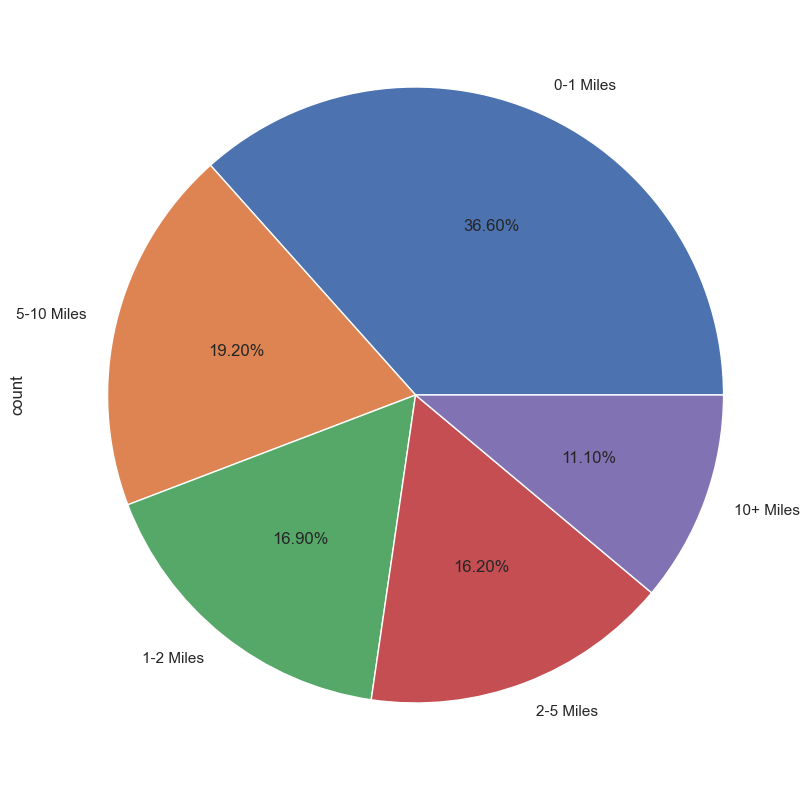

In [23]:
plt.figure(1, figsize=(10,10))
df['Commute Distance'].value_counts().plot.pie(autopct="%1.2f%%")

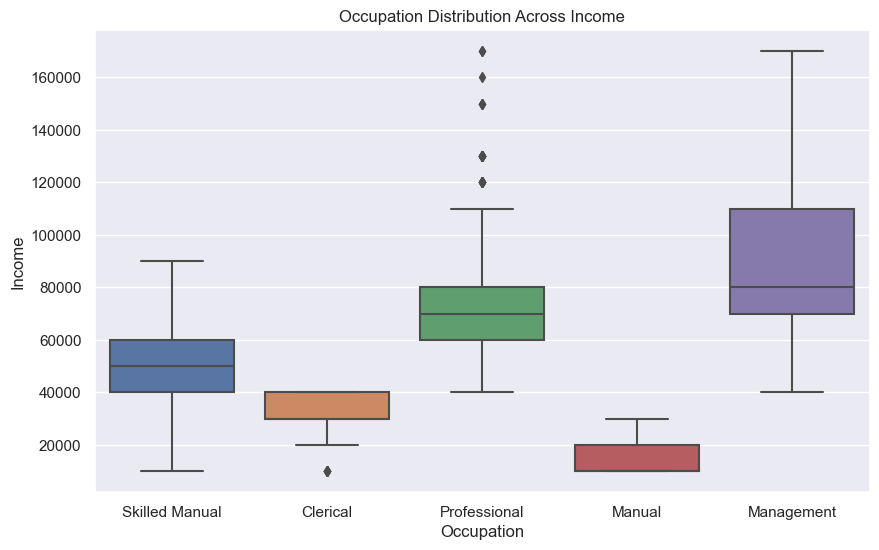

In [24]:
# Create a box plot to visualize the occupation distribution across different Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Income', data=df)
plt.title('Occupation Distribution Across Income')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.show()

In [23]:
# Descriptive Analysis
# The mean, median, and mode of the income column
mean_income = df['Income'].mean()
median_income = df['Income'].median()
mode_income = df['Income'].mode()[0]

print(f"\nMean Income: {mean_income}")
print(f"Median Income: {median_income}")
print(f"Mode Income: {mode_income}")


# Descriptive Analysis
# The mean, median, and mode of the age column
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

print(f"\nMean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")


Mean Income: 56140.0
Median Income: 60000.0
Mode Income: 60000

Mean Age: 44.19
Median Age: 43.0
Mode Age: 40


In [25]:
region = df['Region'].value_counts()
print(region)

Region
North America    508
Europe           300
Pacific          192
Name: count, dtype: int64


In [26]:
# Convert categorical variables to numerical representations using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Marital Status','Home Owner', 'Purchased Bike', 'Gender', 'Education', 'Occupation', 'Region', 'Commute Distance'], drop_first=True)
print(df_encoded)

     Income  Children  Cars  Age  Marital Status_1  Home Owner_1  \
0     40000         1     0   42             False          True   
1     30000         3     1   43             False          True   
2     80000         5     2   60             False         False   
3     70000         0     1   41              True          True   
4     30000         0     0   36              True         False   
..      ...       ...   ...  ...               ...           ...   
995   60000         2     2   54             False          True   
996   70000         4     0   35              True          True   
997   60000         2     0   38             False          True   
998  100000         3     3   38              True         False   
999   60000         3     2   53              True          True   

     Purchased Bike_1  Gender_1  Education_1  Education_2  ...  Occupation_1  \
0               False     False        False        False  ...         False   
1               False  

In [29]:
# Aplicar Label Encoding nas variáveis categóricas
label_encoder = LabelEncoder()
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df['Home Owner'] = label_encoder.fit_transform(df['Home Owner'])
df['Purchased Bike'] = label_encoder.fit_transform(df['Purchased Bike'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Commute Distance'] = label_encoder.fit_transform(df['Commute Distance'])

In [30]:
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

df2 = df [~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2)

     Marital Status  Gender  Income  Children  Education  Occupation  \
0                 0       0   40000         1          0           4   
1                 0       1   30000         3          3           0   
2                 0       1   80000         5          3           3   
3                 1       1   70000         0          0           3   
4                 1       1   30000         0          0           0   
..              ...     ...     ...       ...        ...         ...   
995               0       1   60000         2          2           3   
996               1       1   70000         4          1           3   
997               0       1   60000         2          0           4   
998               1       1  100000         3          0           1   
999               1       1   60000         3          2           3   

     Home Owner  Cars  Commute Distance  Region  Age  Purchased Bike  
0             1     0                 0       0   42            

In [31]:
scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(df)
minmax = pd.DataFrame(minmax)

In [32]:
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(df)
standard = pd.DataFrame(standard)

In [33]:
scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(df)
robust = pd.DataFrame(robust)

In [34]:
print('\033[1m'+'Without scaling:'+'\033[0m')
display(df.head())
print('*' * 45)
print('\033[1m'+'With minmax scaling:'+'\033[0m')
display(minmax.head())
print('*' * 45)
print('\033[1m'+'With standard scaling:'+'\033[0m')
display(standard.head())
print('*' * 45 )
print('\033[1m'+'With robust scaling:'+'\033[0m')
display(robust.head())

Without scaling:


,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,0,0,40000,1,0,4,1,0,0,0,42,0
1,0,1,30000,3,3,0,1,1,0,0,43,0
2,0,1,80000,5,3,3,0,2,3,0,60,0
3,1,1,70000,0,0,3,1,1,4,2,41,1
4,1,1,30000,0,0,0,0,0,0,0,36,1


*********************************************
With minmax scaling:


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.1875,0.2,0.00,1.00,1.0,0.00,0.00,0.0,0.265625,0.0
1,0.0,1.0,0.1250,0.6,0.75,0.00,1.0,0.25,0.00,0.0,0.281250,0.0
2,0.0,1.0,0.4375,1.0,0.75,0.75,0.0,0.50,0.75,0.0,0.546875,0.0
3,1.0,1.0,0.3750,0.0,0.00,0.75,1.0,0.25,1.00,1.0,0.250000,1.0
4,1.0,1.0,0.1250,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.171875,1.0


*********************************************
With standard scaling:


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.924818,-1.018165,-0.519538,-0.558673,-1.205394,1.198577,0.678125,-1.291651,-1.053757,-1.287041,-0.192988,-0.962695
1,-0.924818,0.982159,-0.841433,0.671884,1.011762,-1.555190,0.678125,-0.402084,-1.053757,-1.287041,-0.104866,-0.962695
2,-0.924818,0.982159,0.768041,1.902441,1.011762,0.510135,-1.474654,0.487483,0.867988,-1.287041,1.393214,-0.962695
3,1.081294,0.982159,0.446146,-1.173951,-1.205394,0.510135,0.678125,-0.402084,1.508570,1.598701,-0.281110,1.038750
4,1.081294,0.982159,-0.841433,-1.173951,-1.205394,-1.555190,-1.474654,-1.291651,-1.053757,-1.287041,-0.721722,1.038750


*********************************************
With robust scaling:


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,-1.0,-0.50,-0.333333,-0.666667,0.333333,0.0,-1.0,-0.333333,-1.0,-0.058824,0.0
1,0.0,0.0,-0.75,0.333333,0.333333,-1.000000,0.0,0.0,-0.333333,-1.0,0.000000,0.0
2,0.0,0.0,0.50,1.000000,0.333333,0.000000,-1.0,1.0,0.666667,-1.0,1.000000,0.0
3,1.0,0.0,0.25,-0.666667,-0.666667,0.000000,0.0,0.0,1.000000,1.0,-0.117647,1.0
4,1.0,0.0,-0.75,-0.666667,-0.666667,-1.000000,-1.0,-1.0,-0.333333,-1.0,-0.411765,1.0


In [35]:
#Creating Feature columns and Target column
feature_cols = ['Marital Status', 'Gender', 'Income', 'Children','Education','Occupation','Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
X = df[feature_cols]
y = df['Purchased Bike']

In [36]:
#Check size of data
X.shape

(1000, 11)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [38]:
print(X_train)
print(X_test)

     Marital Status  Gender  Income  Children  Education  Occupation  \
29                1       0   20000         0          4           2   
535               0       1   50000         3          0           4   
695               0       1   80000         5          3           3   
557               0       0   40000         3          3           0   
836               0       0   40000         0          3           4   
..              ...     ...     ...       ...        ...         ...   
106               0       1   70000         2          3           4   
270               1       0   10000         2          3           2   
860               1       1   30000         0          3           4   
435               1       0   10000         2          0           0   
102               0       1   10000         2          3           2   

     Home Owner  Cars  Commute Distance  Region  Age  
29            0     2                 0       0   32  
535           1     3    

In [39]:
scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

X_train = scaler.transform(X_train) #transform training data
X_test = scaler.transform(X_test) #transform validation data

# All models for cehck the best choice
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Check models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} - Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

# Best model
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]}")

Logistic Regression - Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.54      0.62      0.58       106
           1       0.49      0.40      0.44        94

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.52      0.51       200

Random Forest - Accuracy: 0.705
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       106
           1       0.69      0.68      0.68        94

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200

SVM - Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       106
           1       0.62      0.54      0.58        94

    accuracy                           0.63       200
   macro avg       0.63      0.63     

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1])

In [41]:
from sklearn.metrics import accuracy_score

rf_acc = accuracy_score(y_test, y_pred)
print("accuracy_score: ", rf_acc)

accuracy_score:  0.73


In [42]:
rf_train_score = rf.score(X_train, y_train)

rf_test_score= rf.score(X_test, y_test)


print('Random Forest Classifier Train Score is : ' , rf_train_score)

print('Random Forest Classifier Test Score is : ' , rf_test_score)

Random Forest Classifier Train Score is :  0.99375
Random Forest Classifier Test Score is :  0.73


In [43]:
from sklearn import  metrics
rf_acc = 100*rf.score(X_test, y_test)
print('Random Forest Classifier Predictions : \n', rf.predict(X_test), '\n Accuracy:', rf_acc, '%')

Random Forest Classifier Predictions : 
 [0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0
 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1
 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1
 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1] 
 Accuracy: 73.0 %


In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[83 23]
 [31 63]]


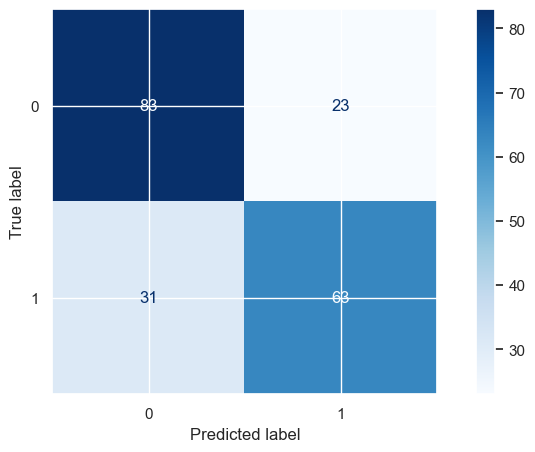

<Figure size 1000x800 with 0 Axes>

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix Dispaly
disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap=plt.cm.Blues)
plt.figure(figsize = (10,8))
plt.show()

In [43]:
# Separate features and target variable
X = df.drop('Purchased Bike', axis=1)
y = df['Purchased Bike']

# Encode categorical variables
X = pd.get_dummies(X)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.715
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       106
           1       0.71      0.67      0.69        94

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluating the model
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# Check optimized Model Accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {accuracy_optimized}")
print(classification_report(y_test, y_pred_optimized))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Model Accuracy: 0.715
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       106
           1       0.71      0.66      0.69        94

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.71
Precision: 0.7
Recall: 0.6702127659574468
F1-Score: 0.6847826086956521


In [113]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data standardization process, scaling the data to mean 0 and variance 1
    ('svc', SVC(kernel='linear'))  # Support vector machine classifier, using linear kernel
])

In [114]:
# Function to perform K-Fold cross-validation with different K values
def evaluate_model_with_kfold(X, y, k_values):
    results = {}
    for k in k_values:
        print(f"Evaluating with K={k}")
        kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
        results[k] = (np.mean(scores), np.std(scores))
        print(f"Mean Accuracy: {np.mean(scores):.2f}, Standard Deviation: {np.std(scores):.2f}\n")
    return results

In [115]:
# Define K values to evaluate
k_values = [5, 8, 10,12,15]


# Evaluate the model
results = evaluate_model_with_kfold(X, y, k_values)

Evaluating with K=5
Mean Accuracy: 0.62, Standard Deviation: 0.04

Evaluating with K=8
Mean Accuracy: 0.63, Standard Deviation: 0.04

Evaluating with K=10
Mean Accuracy: 0.62, Standard Deviation: 0.05

Evaluating with K=12
Mean Accuracy: 0.63, Standard Deviation: 0.05

Evaluating with K=15
Mean Accuracy: 0.63, Standard Deviation: 0.05



In [116]:
# Print summary of results - Usar esse modelo no assessment
for k, (mean, std) in results.items():
    print(f"K={k}: Mean Accuracy={mean:.2f}, Std={std:.2f}")

K=5: Mean Accuracy=0.62, Std=0.04
K=8: Mean Accuracy=0.63, Std=0.04
K=10: Mean Accuracy=0.62, Std=0.05
K=12: Mean Accuracy=0.63, Std=0.05
K=15: Mean Accuracy=0.63, Std=0.05


In [117]:
# Print summary of results
for k, (mean, std) in results.items():
    print(f"K={k}: Mean Accuracy={mean}, Std={std}")

K=5: Mean Accuracy=0.6200000000000001, Std=0.041231056256176596
K=8: Mean Accuracy=0.6280000000000001, Std=0.04363484845854287
K=10: Mean Accuracy=0.625, Std=0.04588027898781785
K=12: Mean Accuracy=0.6251434308663224, Std=0.04890605206836233
K=15: Mean Accuracy=0.6250716116387759, Std=0.04999648086135077
